In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import cv2
import glob
from skimage.io import imread_collection
import os
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import imageio as iio
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
keras = tf.keras
import itertools

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix  

#Displaying an Image from Dataset

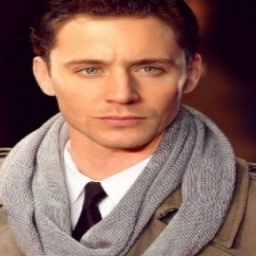

In [5]:
img = []
for i in range(689, 949): 
  path = "/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/train/Real Face/image"
  n = cv2.imread(path+str(i)+".jpeg")
  img.append(n)
 

cv2_imshow(img[12])

#Reading Images as RGB

In [6]:
#Create labels for the images. 
tr_labels = []
i = 340
while(i>0):
  tr_labels.append(np.array([1])) #1 for actual face. 
  i = i-1
i = 268
while(i>0):
  tr_labels.append(np.array([0])) #0 for fake face. 
  i = i-1

ts_labels = []
i = 30
while(i>0):
  ts_labels.append(np.array([1])) #1 for actual face. 
  i = i-1
i = 25
while(i>0):
  ts_labels.append(np.array([0])) #0 for fake face. 
  i = i-1

In [7]:
print(len(tr_labels), len(ts_labels))

608 55


In [8]:
tr_labels = np.array(tr_labels)
tr_labels.shape

ts_labels = np.array(ts_labels)

In [9]:
#Read all the images from dataset. 
tr_images = []
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/train/Real Face/*.jpeg"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    tr_images.append(n)
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/train/Other Object/*.jpeg"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    tr_images.append(n)


ts_images = []
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/test/Real Face/*.jpeg"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    ts_images.append(n)
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/test/Real Face/*.jpg"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    ts_images.append(n)
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/test/Real Face/*.png"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    ts_images.append(n)
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/test/Other Object/*.jpeg"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    ts_images.append(n)
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/test/Other Object/*.jpg"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    ts_images.append(n)
for img in glob.glob("/content/drive/MyDrive/Data Sets - Colab/UTS Thesis/Face - real, drawing, not a face/test/Other Object/*.png"):
    n= cv2.imread(img)
    n = cv2.resize(n, (224, 224))
    ts_images.append(n)

In [10]:
tr_images = np.array(tr_images)
ts_images = np.array(ts_images)
print(tr_images.shape)
print(ts_images.shape)
print(len(tr_labels))
print(len(ts_labels))

(608, 224, 224, 3)
(55, 224, 224, 3)
608
55


In [11]:
#Data Augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images upto 180 degrees
        shear_range=0.2,
        zoom_range = 0.15, # randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=False, # randomly flip images vertically
        fill_mode='nearest')  


datagen.fit(tr_images)

#CNN Model

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(tr_images, tr_labels, epochs=30, 
                    validation_data=(ts_images, ts_labels))

Epoch 1/30
19/19 [==============================] - 8s 104ms/step - loss: 309.6969 - accuracy: 0.5082 - val_loss: 0.6930 - val_accuracy: 0.5455
Epoch 2/30
19/19 [==============================] - 1s 61ms/step - loss: 0.6927 - accuracy: 0.5592 - val_loss: 0.6926 - val_accuracy: 0.5455
Epoch 3/30
19/19 [==============================] - 1s 61ms/step - loss: 0.6922 - accuracy: 0.5592 - val_loss: 0.6922 - val_accuracy: 0.5455
Epoch 4/30
19/19 [==============================] - 1s 59ms/step - loss: 0.6918 - accuracy: 0.5592 - val_loss: 0.6917 - val_accuracy: 0.5455
Epoch 5/30
19/19 [==============================] - 1s 59ms/step - loss: 0.6911 - accuracy: 0.5592 - val_loss: 0.6913 - val_accuracy: 0.5455
Epoch 6/30
19/19 [==============================] - 1s 58ms/step - loss: 0.6906 - accuracy: 0.5592 - val_loss: 0.6910 - val_accuracy: 0.5455
Epoch 7/30
19/19 [==============================] - 1s 52ms/step - loss: 0.6901 - accuracy: 0.5592 - val_loss: 0.6907 - val_accuracy: 0.5455
Epoch 8/30

In [14]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.6891 - accuracy: 0.5455 - 56ms/epoch - 28ms/step
0.5454545617103577


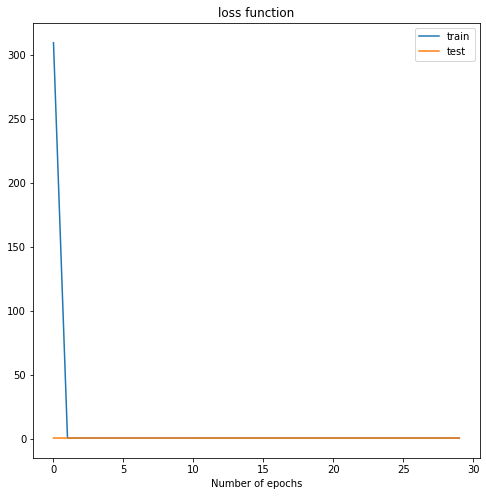

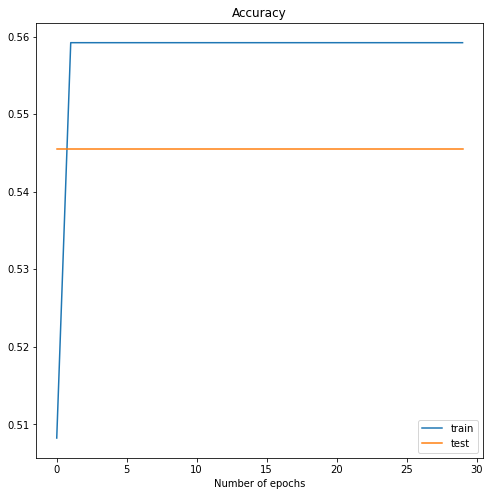

In [15]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [16]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.545455
Precision: 0.545455
Recall: 1.000000
F1 score: 0.705882
[[ 0 25]
 [ 0 30]]


#Pre-Trained MobileVNet

In [97]:
mobilenetV2 = MobileNetV2(input_shape=(224, 224, 3),
                          include_top=False,
                          weights='imagenet'
                          )

average_layer = GlobalAveragePooling2D()

"""
model = Sequential([
    mobilenetV2,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation=tf.nn.softmax)
])
"""

model = Sequential([
    mobilenetV2,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.1),
    Dense(2, activation=tf.nn.softmax)
])

In [98]:
model.layers[0].trainable = False

In [99]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [100]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [101]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=5, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/5
19/19 [==============================] - 5s 122ms/step - loss: 0.5487 - accuracy: 0.7516 - val_loss: 1.0417 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - 1s 47ms/step - loss: 0.2789 - accuracy: 0.8898 - val_loss: 0.9106 - val_accuracy: 0.6909 - lr: 0.0010
Epoch 3/5
19/19 [==============================] - 1s 47ms/step - loss: 0.1786 - accuracy: 0.9276 - val_loss: 0.4628 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 4/5
19/19 [==============================] - 1s 43ms/step - loss: 0.1387 - accuracy: 0.9507 - val_loss: 0.4664 - val_accuracy: 0.8182 - lr: 1.0000e-04
Epoch 5/5
19/19 [==============================] - 1s 44ms/step - loss: 0.1307 - accuracy: 0.9490 - val_loss: 0.4745 - val_accuracy: 0.8182 - lr: 1.0000e-04


In [102]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.4745 - accuracy: 0.8182 - 80ms/epoch - 40ms/step
0.8181818127632141


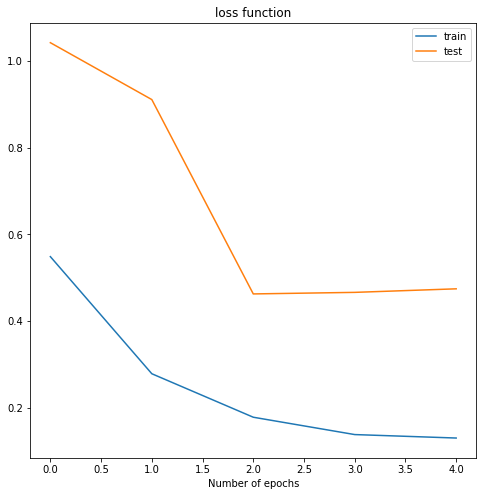

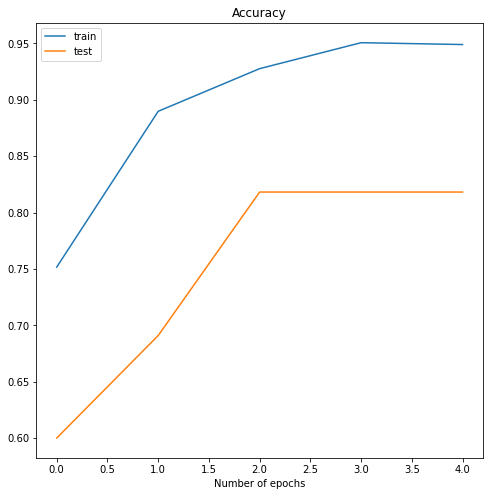

In [103]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [104]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.818182
Precision: 0.750000
Recall: 1.000000
F1 score: 0.857143
[[15 10]
 [ 0 30]]


#Pre-Trained VGG16

In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

In [26]:
vgg16_model.output[-1]

<KerasTensor: shape=(7, 7, 512) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [27]:
model = Sequential([vgg16_model,
                    Flatten(),
#                     GlobalAveragePooling2D(),
#                     Dense(512, activation = "relu"),
#                     BatchNormalization(),
#                     Dropout(0.3),
#                     Dense(128, activation = "relu"),
#                     Dropout(0.1),
#                     # Dense(32, activation = "relu"),
#                     # Dropout(0.3),
                    Dense(2, activation = "softmax")])

In [28]:
model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=5, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/5
19/19 [==============================] - 9s 286ms/step - loss: 0.5359 - accuracy: 0.9572 - val_loss: 0.2240 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - 3s 161ms/step - loss: 0.0565 - accuracy: 0.9984 - val_loss: 0.6923 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 3/5
19/19 [==============================] - 3s 160ms/step - loss: 4.3135e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/5
19/19 [==============================] - 3s 161ms/step - loss: 4.5565e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/5
19/19 [==============================] - 3s 161ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1674e-09 - val_accuracy: 1.0000 - lr: 1.0000e-04


In [31]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 2.1674e-09 - accuracy: 1.0000 - 274ms/epoch - 137ms/step
1.0


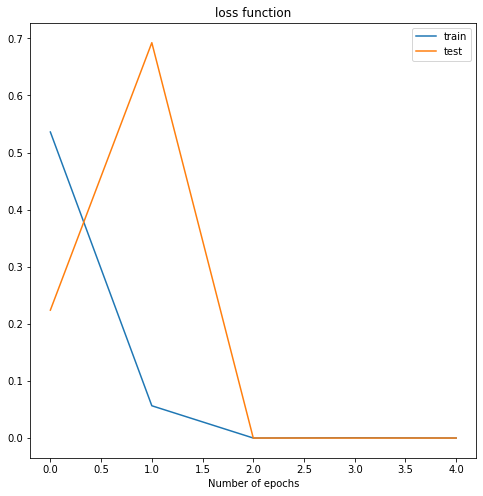

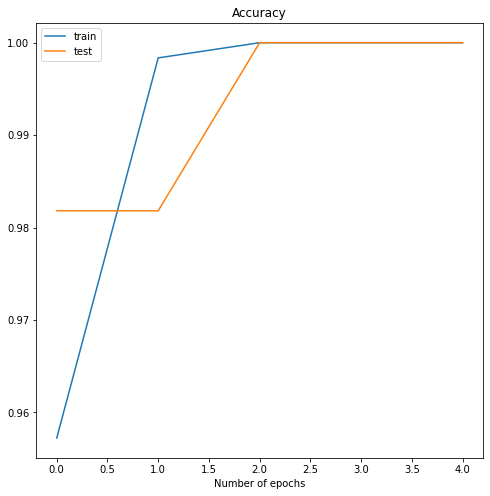

In [32]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [33]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
[[25  0]
 [ 0 30]]


In [34]:
predictions = model.predict_generator(ts_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


#Pret-trained VGG19

In [35]:
vgg19_model = tf.keras.applications.vgg19.VGG19(include_top=True, weights="imagenet", input_shape=(224,224,3))

In [36]:
vgg19_model.output[-1]

<KerasTensor: shape=(1000,) dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

In [37]:
model = Sequential()
model.add(vgg19_model)
model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1000)              143667240 
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [38]:
model.layers[0].trainable = False
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [39]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=10, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/10
19/19 [==============================] - 5s 208ms/step - loss: 0.2005 - accuracy: 0.9211 - val_loss: 0.6656 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 4s 192ms/step - loss: 0.0120 - accuracy: 0.9984 - val_loss: 0.6574 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 4s 192ms/step - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.6504 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 4s 192ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.6486 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 5/10
19/19 [==============================] - 4s 193ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.6463 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 6/10
19/19 [==============================] - 4s 194ms/step - loss: 0.0097 - accuracy: 0.9951 - val_loss: 0.6432 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 7/10
19/19 [==============================] - 4s 197

In [40]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.6055 - accuracy: 0.5455 - 373ms/epoch - 187ms/step
0.5454545617103577


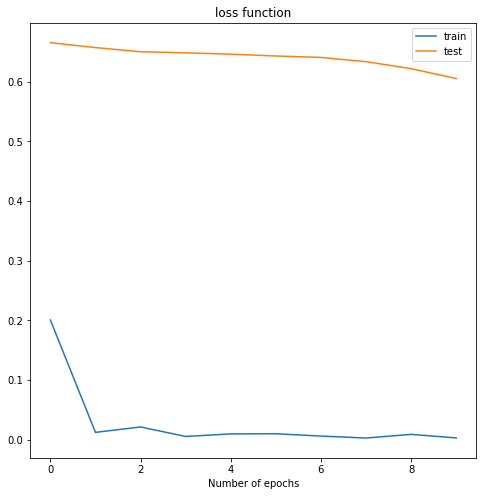

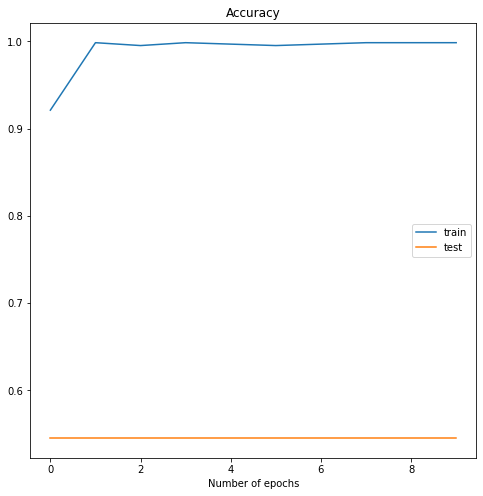

In [41]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [42]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.545455
Precision: 0.545455
Recall: 1.000000
F1 score: 0.705882
[[ 0 25]
 [ 0 30]]


#DenseNet Model

In [43]:
densenet = DenseNet121(weights='imagenet',
                           include_top=False,
                           input_shape=(224,224,3)
                          )

In [44]:
model = tf.keras.models.Sequential([densenet,
                                        GlobalAveragePooling2D(),
                                        Dense(512, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.3),
                                        Dense(256, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.2),                                        
                                        Dense(128, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.1),
                                        Dense(2, activation='softmax')
                                      ])

In [45]:
model.layers[0].trainable = False

In [46]:
model.compile(optimizer=Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)              

In [48]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=15, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/15
19/19 [==============================] - 14s 294ms/step - loss: 0.5545 - accuracy: 0.7582 - val_loss: 0.4655 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 2/15
19/19 [==============================] - 2s 99ms/step - loss: 0.2587 - accuracy: 0.8964 - val_loss: 0.7203 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 3/15
19/19 [==============================] - 2s 99ms/step - loss: 0.2121 - accuracy: 0.9178 - val_loss: 0.5295 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 4/15
19/19 [==============================] - 2s 98ms/step - loss: 0.1730 - accuracy: 0.9276 - val_loss: 0.4981 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 5/15
19/19 [==============================] - 2s 99ms/step - loss: 0.1415 - accuracy: 0.9490 - val_loss: 0.3799 - val_accuracy: 0.8364 - lr: 1.0000e-04
Epoch 6/15
19/19 [==============================] - 2s 108ms/step - loss: 0.1745 - accuracy: 0.9161 - val_loss: 0.4000 - val_accuracy: 0.8364 - lr: 1.0000e-04
Epoch 7/15
19/19 [==============================] - 2s 99ms/s

In [49]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.3607 - accuracy: 0.8364 - 169ms/epoch - 85ms/step
0.8363636136054993


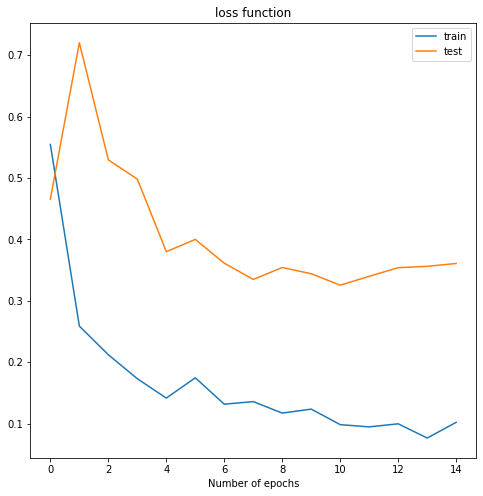

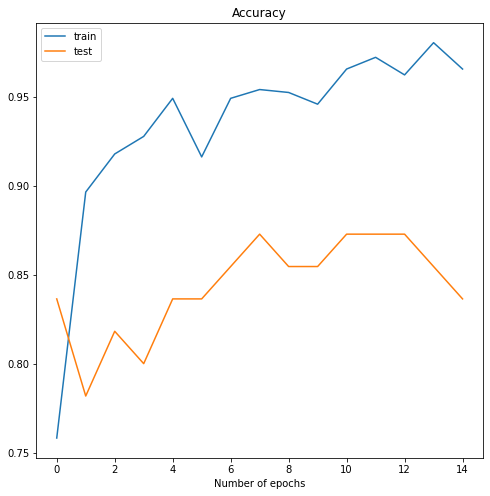

In [50]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [51]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.836364
Precision: 0.818182
Recall: 0.900000
F1 score: 0.857143
[[19  6]
 [ 3 27]]


#Pre Trained Inception V3

In [52]:
inc_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [53]:
print("number of layers in the model : ", len(inc_model.layers))

number of layers in the model :  311


In [54]:
model = tf.keras.models.Sequential([inc_model,
                                        GlobalAveragePooling2D(),
                                    
                                        Dense(512, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.3),   
                                                                     
                                        Dense(2, activation='softmax')
                                      ])

In [55]:
model.layers[0].trainable = False

In [56]:
model.compile(optimizer=Adam(lr=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy']
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_102 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 2)                

In [58]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=15, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/15
19/19 [==============================] - 9s 226ms/step - loss: 0.7870 - accuracy: 0.7155 - val_loss: 4.9452 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/15
19/19 [==============================] - 1s 77ms/step - loss: 0.4812 - accuracy: 0.8043 - val_loss: 0.9787 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 3/15
19/19 [==============================] - 1s 78ms/step - loss: 0.3912 - accuracy: 0.8207 - val_loss: 0.4697 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 4/15
19/19 [==============================] - 1s 79ms/step - loss: 0.2983 - accuracy: 0.8701 - val_loss: 0.4530 - val_accuracy: 0.8364 - lr: 1.0000e-04
Epoch 5/15
19/19 [==============================] - 1s 78ms/step - loss: 0.3019 - accuracy: 0.8766 - val_loss: 0.4377 - val_accuracy: 0.8182 - lr: 1.0000e-04
Epoch 6/15
19/19 [==============================] - 1s 77ms/step - loss: 0.2913 - accuracy: 0.8734 - val_loss: 0.4463 - val_accuracy: 0.8545 - lr: 1.0000e-04
Epoch 7/15
19/19 [==============================] - 1s 78ms/ste

In [59]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.4583 - accuracy: 0.8000 - 197ms/epoch - 99ms/step
0.800000011920929


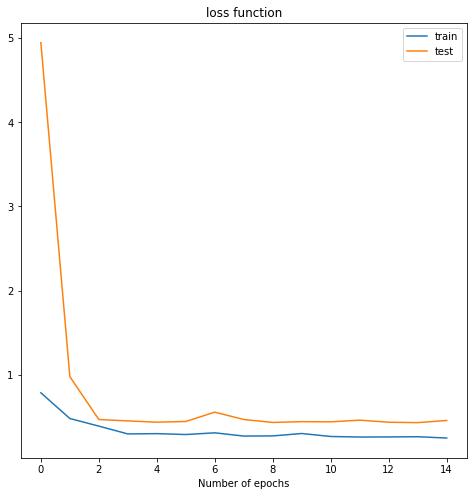

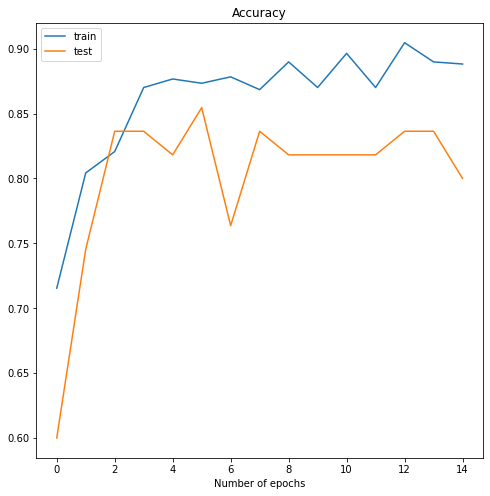

In [60]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [61]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.800000
Precision: 0.771429
Recall: 0.900000
F1 score: 0.830769
[[17  8]
 [ 3 27]]


#Pre Trained ResNet50

In [62]:
res = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [63]:
print("number of layers in the model : ", len(res.layers))

number of layers in the model :  175


In [64]:
model = tf.keras.models.Sequential([res,
                                        GlobalAveragePooling2D(),
                                    
                                        Dense(512, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.3),   
                                    
                                        Dense(256, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.2),  
                                    
                                        Dense(128, activation='relu'),
                                        BatchNormalization(),
                                        Dropout(0.1),  
                                                                     
                                        Dense(2, activation='softmax')
                                      ])

In [65]:
model.layers[0].trainable = False

In [66]:
model.compile(optimizer=Adam(lr=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy']
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_103 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)              

In [68]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=5, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/5
19/19 [==============================] - 10s 266ms/step - loss: 0.1238 - accuracy: 0.9474 - val_loss: 0.0132 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - 2s 113ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 3/5
19/19 [==============================] - 2s 107ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 4/5
19/19 [==============================] - 2s 104ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9818 - lr: 1.0000e-04
Epoch 5/5
19/19 [==============================] - 2s 104ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9818 - lr: 1.0000e-04


In [69]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.0401 - accuracy: 0.9818 - 214ms/epoch - 107ms/step
0.9818181991577148


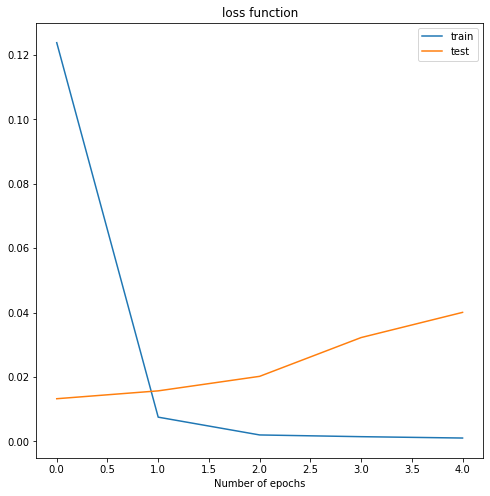

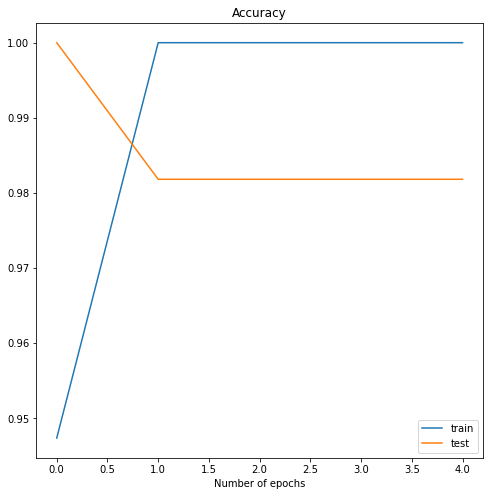

In [70]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [71]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.981818
Precision: 0.967742
Recall: 1.000000
F1 score: 0.983607
[[24  1]
 [ 0 30]]


#SSD Image Classification

In [72]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [73]:
model.compile(optimizer=Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_98 (Conv2D)          (None, 222, 222, 64)      18496     
                                                                 
 conv2d_99 (Conv2D)          (None, 220, 220, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 110, 110, 128)     0         
                                                                 
 flatten_3 (Flatten)         (None, 1548800)           0         
                                                      

In [75]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=10, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/10
19/19 [==============================] - 10s 340ms/step - loss: 614.2864 - accuracy: 0.5477 - val_loss: 0.6929 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 5s 279ms/step - loss: 2.0212 - accuracy: 0.5641 - val_loss: 0.6923 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 5s 279ms/step - loss: 0.6918 - accuracy: 0.5592 - val_loss: 0.6919 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 5s 279ms/step - loss: 0.6915 - accuracy: 0.5592 - val_loss: 0.6919 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 5/10
19/19 [==============================] - 5s 279ms/step - loss: 0.6914 - accuracy: 0.5592 - val_loss: 0.6918 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 6/10
19/19 [==============================] - 5s 279ms/step - loss: 0.6913 - accuracy: 0.5592 - val_loss: 0.6918 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 7/10
19/19 [==============================] - 5s 

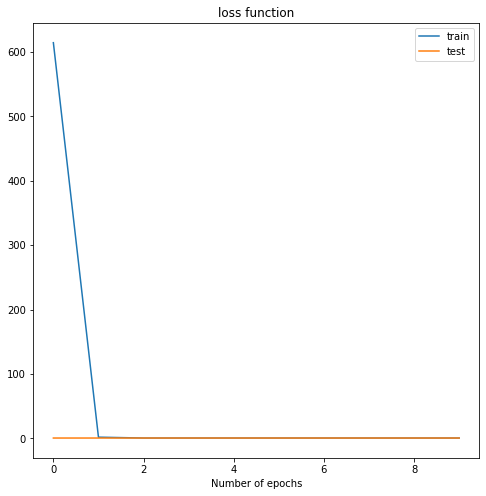

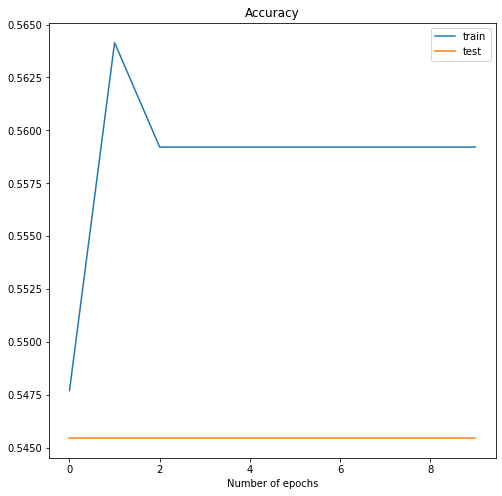

In [76]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [77]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.6916 - accuracy: 0.5455 - 219ms/epoch - 110ms/step
0.5454545617103577


In [78]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.545455
Precision: 0.545455
Recall: 1.000000
F1 score: 0.705882
[[ 0 25]
 [ 0 30]]


#AlexNet

In [79]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(224,224,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(2,activation="softmax"))

In [80]:
model.compile(optimizer=Adam(lr=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy']
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [81]:
#model.summary()

In [82]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=10, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/10
19/19 [==============================] - 3s 78ms/step - loss: 1.2361 - accuracy: 0.6809 - val_loss: 151.3367 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 1s 32ms/step - loss: 0.6321 - accuracy: 0.8059 - val_loss: 32.7472 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 1s 31ms/step - loss: 0.4544 - accuracy: 0.8553 - val_loss: 15.3122 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 1s 31ms/step - loss: 0.3143 - accuracy: 0.8684 - val_loss: 2.3647 - val_accuracy: 0.6364 - lr: 1.0000e-04
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 0.3100 - accuracy: 0.8766 - val_loss: 3.8416 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 6/10
19/19 [==============================] - 1s 31ms/step - loss: 0.2750 - accuracy: 0.8914 - val_loss: 1.1566 - val_accuracy: 0.6909 - lr: 1.0000e-04
Epoch 7/10
19/19 [==============================] - 1s 31ms/

In [83]:
test_loss, test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.9112 - accuracy: 0.7636 - 38ms/epoch - 19ms/step
0.7636363506317139


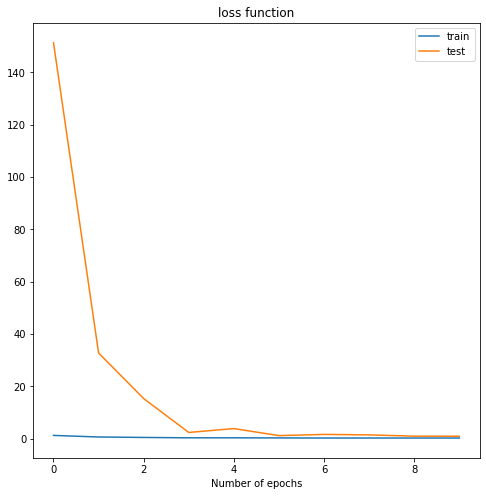

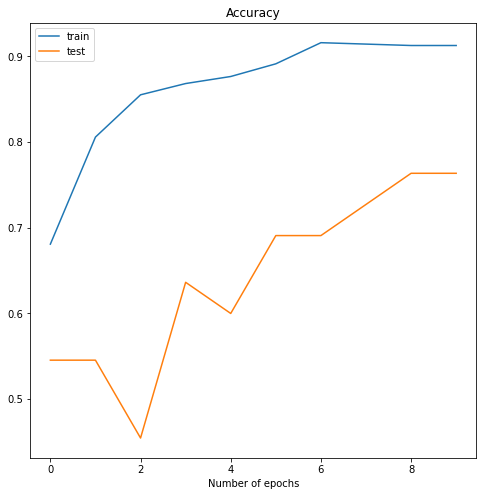

In [84]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [85]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs,axis=1) #1-D array of classes
yhat_probs = yhat_probs[:, 0] # reduce to 1d array


accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.763636
Precision: 0.697674
Recall: 1.000000
F1 score: 0.821918
[[12 13]
 [ 0 30]]


#GoogleNet

In [86]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [87]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(5, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(1000, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(2, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [88]:
model = GoogLeNet()

In [89]:
model.compile(optimizer=Adam(lr=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy']
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [90]:
#model.summary()

In [91]:
hist = model.fit(x=tr_images, y = tr_labels, 
                    epochs=20, validation_data=(ts_images, ts_labels),
                    callbacks=[lr_callbacks])

Epoch 1/20
19/19 [==============================] - 10s 209ms/step - loss: 4.8066 - dense_30_loss: 1.0432 - dense_27_loss: 2.0838 - dense_29_loss: 1.6796 - dense_30_accuracy: 0.5263 - dense_27_accuracy: 0.5049 - dense_29_accuracy: 0.4720 - val_loss: 2.1050 - val_dense_30_loss: 0.6998 - val_dense_27_loss: 0.6673 - val_dense_29_loss: 0.7379 - val_dense_30_accuracy: 0.5455 - val_dense_27_accuracy: 0.7636 - val_dense_29_accuracy: 0.5455 - lr: 0.0010
Epoch 2/20
19/19 [==============================] - 2s 102ms/step - loss: 2.2128 - dense_30_loss: 0.6944 - dense_27_loss: 0.7419 - dense_29_loss: 0.7764 - dense_30_accuracy: 0.5592 - dense_27_accuracy: 0.5263 - dense_29_accuracy: 0.5461 - val_loss: 2.0311 - val_dense_30_loss: 0.6890 - val_dense_27_loss: 0.6545 - val_dense_29_loss: 0.6876 - val_dense_30_accuracy: 0.5455 - val_dense_27_accuracy: 0.8000 - val_dense_29_accuracy: 0.5455 - lr: 0.0010
Epoch 3/20
19/19 [==============================] - 2s 102ms/step - loss: 2.0991 - dense_30_loss: 0.6

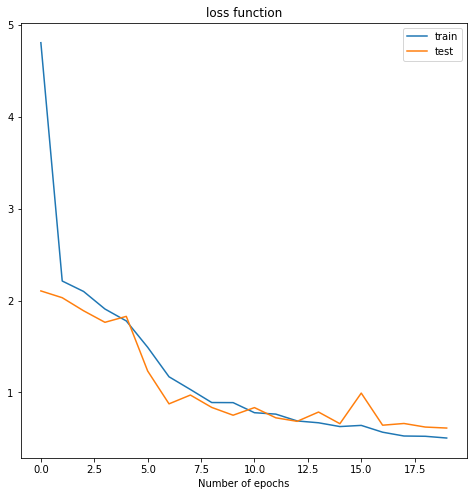

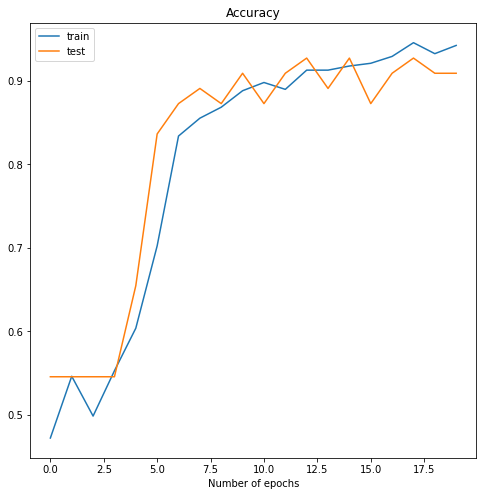

In [93]:
# plot loss with epochs
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('loss function')
plt.xlabel('Number of epochs')
plt.show()

# Plot accuracy through epochs
plt.figure(figsize=(8, 8))
plt.plot(hist.history['dense_29_accuracy'], label = 'train')
plt.plot(hist.history['val_dense_29_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

In [94]:
test_acc = model.evaluate(ts_images,  ts_labels, verbose=2)
print(test_acc)

2/2 - 0s - loss: 0.6125 - dense_30_loss: 0.2189 - dense_27_loss: 0.1963 - dense_29_loss: 0.1972 - dense_30_accuracy: 0.9091 - dense_27_accuracy: 0.9273 - dense_29_accuracy: 0.9091 - 123ms/epoch - 62ms/step
[0.6124622821807861, 0.21893295645713806, 0.19633615016937256, 0.19719313085079193, 0.9090909361839294, 0.9272727370262146, 0.9090909361839294]


In [95]:
yhat_probs = model.predict(ts_images, verbose=0) # predict probabilities for test set
yhat_classes = np.argmax(yhat_probs[0],axis=1) #1-D array of classes

In [96]:
accuracy = accuracy_score(ts_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(ts_labels, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(ts_labels, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(ts_labels, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(ts_labels, yhat_classes)
print(matrix)

Accuracy: 0.909091
Precision: 0.931034
Recall: 0.900000
F1 score: 0.915254
[[23  2]
 [ 3 27]]
